In [1]:
import matplotlib.pyplot as plt

.hist() : plot a histogram <br>
빈도수를 나타내는 함수

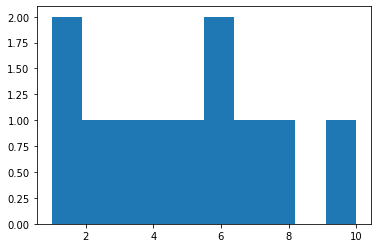

In [2]:
plt.hist([1,1,2,3,4,5,6,6,7,8,10]) # histogram : 빈도수(1이 두개, 6이두개)
plt.show()

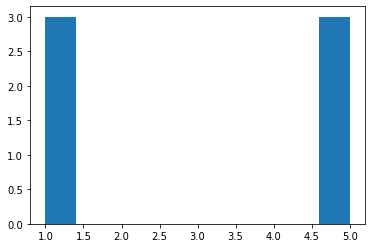

In [3]:
plt.hist([1,1,1,5,5,5])
plt.show()

* 주사위를 굴린다
* 나온 결과를 기록한다
* 위의 과정을 n번 반복한다 => n개의 결과[]
* 주사위의 눈이 나온 횟수를 히스토그램으로 그린다

In [11]:
import random
dice = []
for i in range(5) :
    dice.append(random.randint(1, 6))
print(dice)

[4, 2, 3, 6, 1]


#### random module 
.randint(start, stop) <br>
.randrange(start, stop[, step]) # step은 option <br>
ex)<br>
1. randint(a, b): a <= N <= b
2. randrange(a, b+1)
1과 2는 같은 결과를 가진다

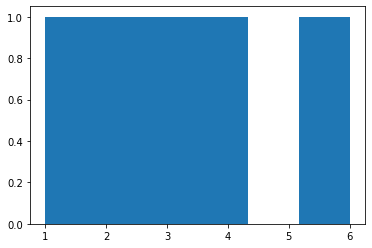

In [13]:
plt.hist(dice, bins=6) # bins : option, default:10 주사위는 6까지 이므로 6으로
plt.show()

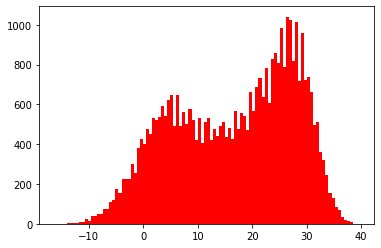

In [18]:
# 100년간 최고온도
import csv

f = open('../unit_02/seoul.csv')
data = csv.reader(f)
next(data)
result = []

for row in data :
    if row[-1] != '' :
        result.append(float(row[-1]))

plt.hist(result, bins=100, color = 'r') # x축이 100칸
plt.show()

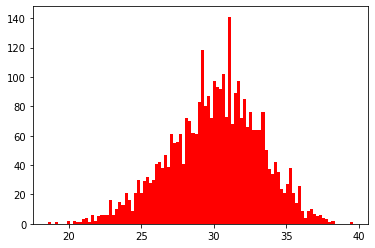

In [20]:
# 100년간 8월의 최고온도
import csv

f = open('../unit_02/seoul.csv')
data = csv.reader(f)
next(data)
result = []

for row in data :
    month = row[0].split('-')[1]
    if row[-1] != '' and month == '08':
        result.append(float(row[-1]))

plt.hist(result, bins=100, color = 'r') # x축이 100칸
plt.show()

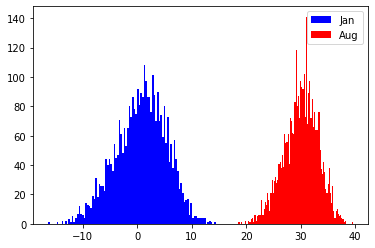

In [22]:
# 1월과 8월 온도 - hist
import csv

f = open('../unit_02/seoul.csv')
data = csv.reader(f)
next(data)

# 1월과 8월 온도 리스트
jan = []
aug = []

for row in data :
    month = row[0].split('-')[1]
    if row[-1] != '':
        if month == '01' :
            jan.append(float(row[-1]))
        if month == '08' :
            aug.append(float(row[-1]))
            
plt.hist(jan, bins=100, color = 'blue', label = 'Jan') # label은 legend
plt.hist(aug, bins = 100, color = 'red', label = 'Aug') 
plt.legend() # 꼭 label 정의한 것 밑에
plt.show() # 정규분포 그래프가 나온다(평균이 가장 빈도수가 높음)

#### boxplot
최댓값, 최소값, 3/4, 2/4, 1/4 값을 표현할 수 있는 상자그림

[171, 260, 307, 383, 529, 565, 591, 647, 659, 772, 906, 910, 974]


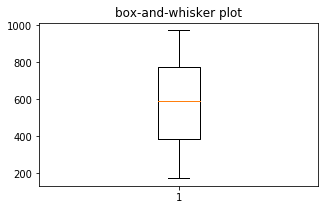

In [23]:
# random number boxplot
import random

result = []

for i in range(13) :
    result.append(random.randint(1, 1000))
print(sorted(result))

plt.figure(figsize = (5, 3))
plt.title('box-and-whisker plot')

plt.boxplot(result)
plt.show()

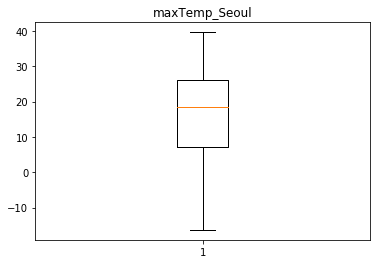

In [24]:
import csv

f = open('../unit_02/seoul.csv')
data = csv.reader(f)
next(data)
result = []

for row in data :
    if row[-1] != '' :
        result.append(float(row[-1]))

plt.title('maxTemp_Seoul')
plt.boxplot(result)
plt.show()

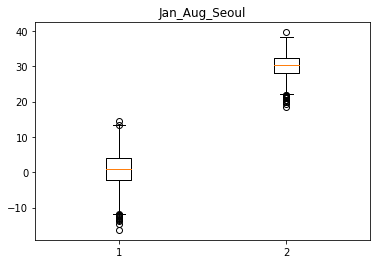

In [27]:
# 1월과 8월 온도 - boxplot
import csv

f = open('../unit_02/seoul.csv')
data = csv.reader(f)
next(data)

# 1월과 8월 온도 리스트
jan = []
aug = []

for row in data :
    month = row[0].split('-')[1]
    if row[-1] != '':
        if month == '01' :
            jan.append(float(row[-1]))
        if month == '08' :
            aug.append(float(row[-1]))

plt.title('Jan_Aug_Seoul')
# 따로 그리면 직선으로 표현된다
# plt.boxplot(jan)
# plt.boxplot(aug)
plt.boxplot([jan, aug]) # 두 list 를 하나의 list로 묶는다
plt.show()

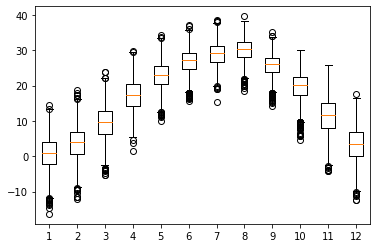

In [29]:
import matplotlib.pyplot as plt
import csv

f = open('../unit_02/seoul.csv')
data = csv.reader(f)
next(data)

# 월별 데이터를 저장할 list month 생성
month = [[], [], [], [], [], [], [], [], [], [], [], []]

for row in data :
    if row[-1] != '':
        month[int(row[0].split('-')[1])-1].append(float(row[-1]))

plt.boxplot(month)
plt.show()

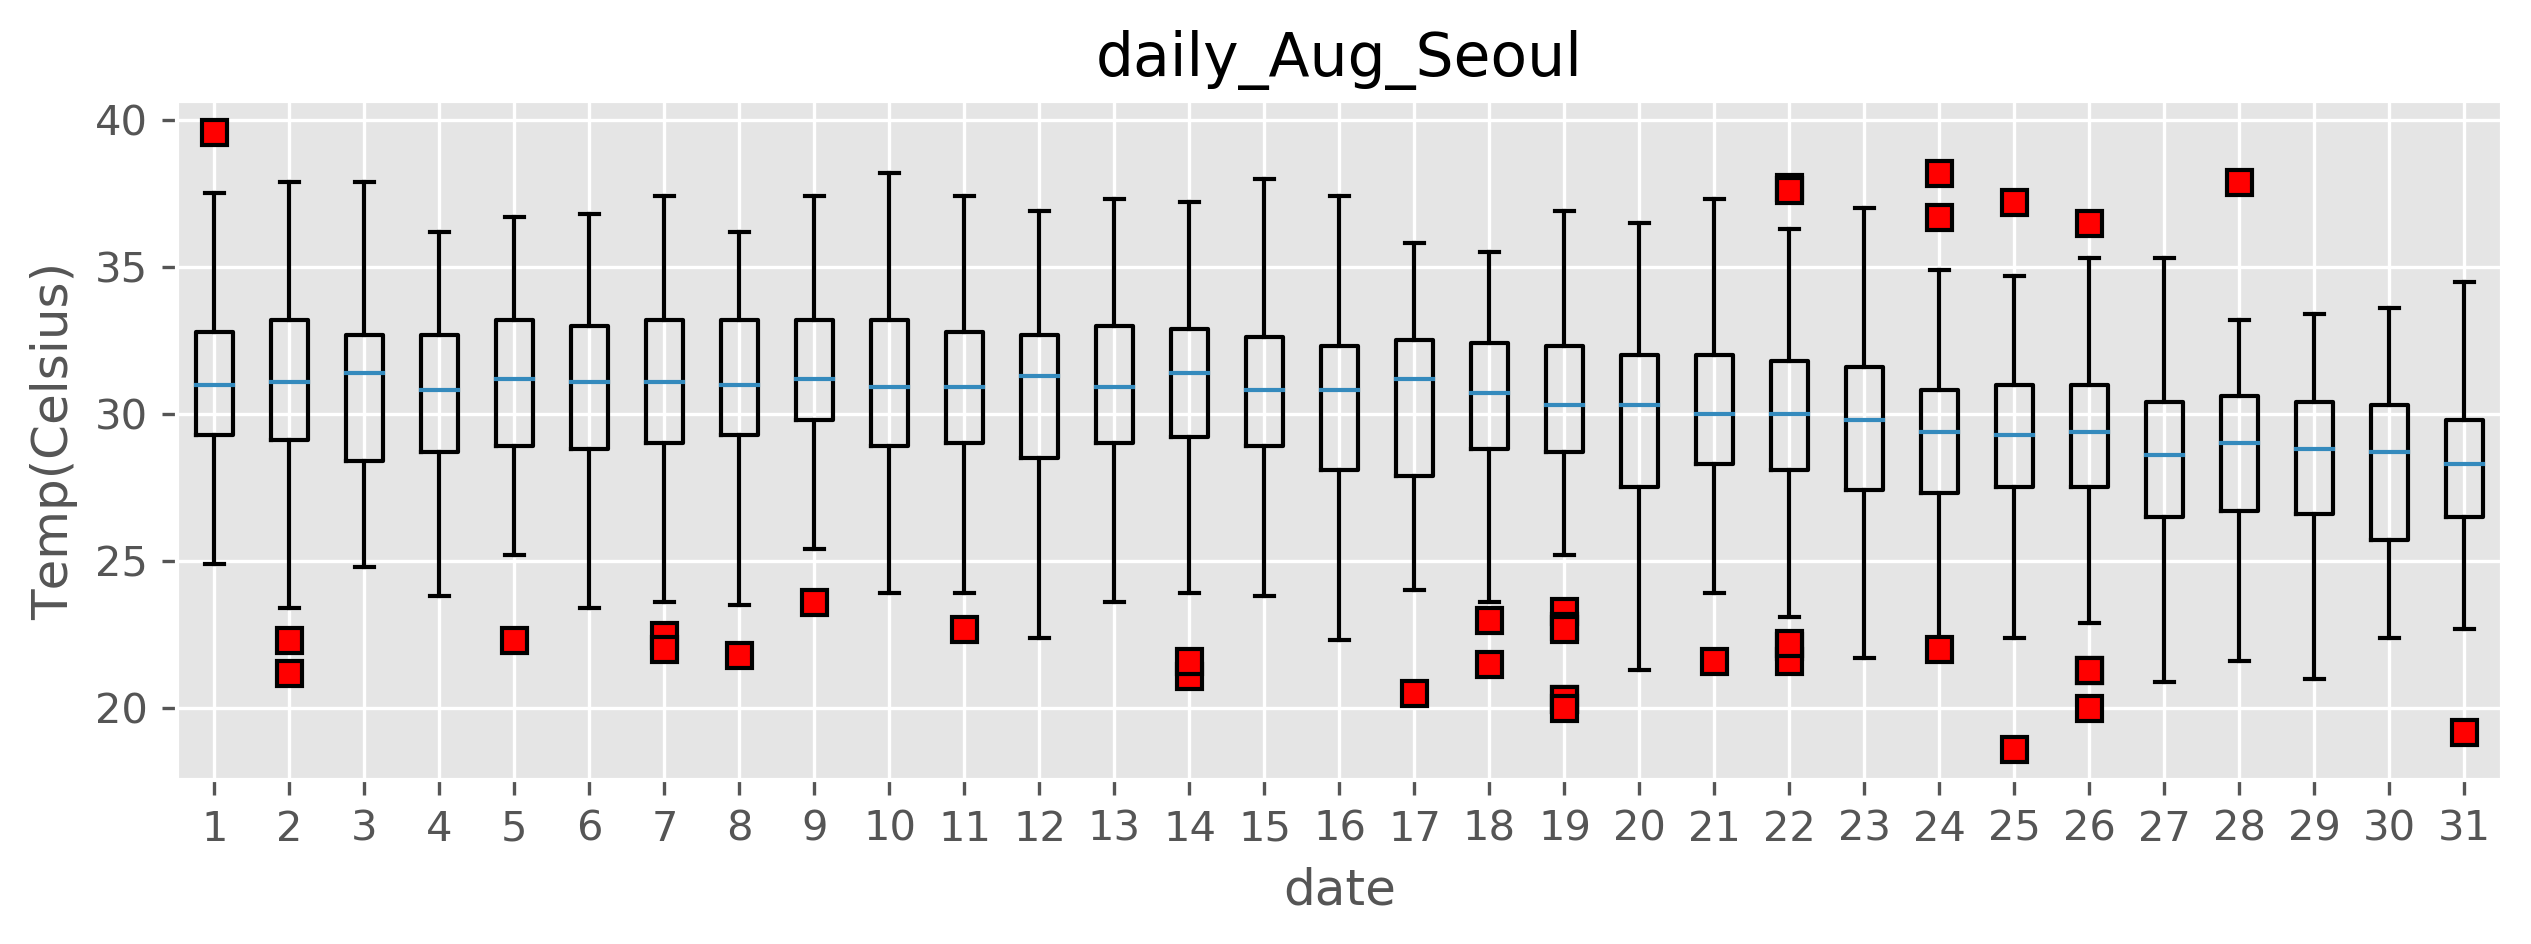

In [46]:
# 매년 8월 날짜별 기온 boxplot
import csv

f = open('../unit_02/seoul.csv')
data = csv.reader(f)
next(data)

# 1 - 31 daily list
day = []
for i in range(31) :
    day.append([])

for row in data :
    if row[-1] != '' :
        if row[0].split('-')[1] == '08' :
            day[int(row[0].split('-')[2]) - 1].append(float(row[-1]))

import matplotlib.pyplot as plt

# 이상점 표현하기 위한 market 설정
red_square = dict(markerfacecolor = 'r', marker = 's') # marker 대소문자는 상관없음
green_diamond = dict(markerfacecolor = 'g', marker = 'D') 
plt.figure(figsize = (10, 3), dpi = 300)
plt.title('daily_Aug_Seoul')

# 축 제목주기
plt.xlabel('date')
plt.ylabel('Temp(Celsius)')

plt.style.use('ggplot') # 격자있는 plot

# plt.boxplot(day) # 기본출력

# 1. 이상점 삭제하기
# plt.boxplot(day, showfliers = False) # 이상점을 나타내지 않음

# 2. 이상점 표현하기
plt.boxplot(day, flierprops = red_square) # vertical
# plt.boxplot(day, vert = False, flierprops = green_diamond) # horizontal

plt.show()

min : -6.2
1/4 : 7.2
2/4 : 18.5
3/4 : 26.2
max : 39.6


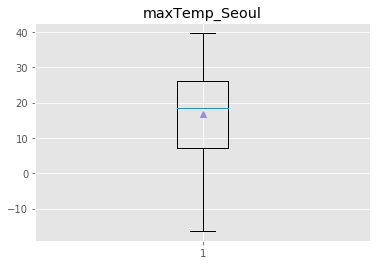

In [40]:
# numpy 위치값 표현
import csv
import numpy as np # 배열처리하기 편함

f = open('../unit_02/seoul.csv')
data = csv.reader(f)
next(data)

result = []

for row in data :
    if row[-1] != '' :
        result.append(float(row[-1]))

# 위치값(그래프만 봐서는 값을 알 수 없으므로)
fesult = np.array(result)
print("min : " + str(np.percentile(result, 1))) # 최소값의 위치 1
print("1/4 : " + str(np.percentile(result, 25)))
print("2/4 : " + str(np.percentile(result, 50)))
print("3/4 : " + str(np.percentile(result, 75)))
print("max : " + str(np.percentile(result, 100)))

import matplotlib.pyplot as plt

plt.title('maxTemp_Seoul')
plt.boxplot(result, showmeans = True) # showmeans : 산술평균 보이기(보라색 삼각형)
plt.show()